# LOGREG FROM SCRATCH



In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE


from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import cvxpy as cp

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=3,
                  random_state=0)

In [ ]:

def surface_func (w, b, xx,yy ):
   z = lambda xx, yy: (-b - w[0] * xx - w[1] * yy) /w[2]
   return z(xx,yy)



def draw_3d (w, b, X, colors):
  tmp = np.linspace(-2,2,10)
  xx,yy = np.meshgrid(tmp,tmp)
  fig = go.Figure([go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode="markers", showlegend=False,
                                marker=dict(color=colors)
                        ),
           go.Surface(x=xx, y=yy, z=surface_func (w, b, xx,yy ), opacity=.5, showscale=False,
                      surfacecolor=np.zeros(xx.shape), colorscale=[[0, 'blue']])])

  fig.update_layout(
    scene = dict(zaxis = dict(nticks=4, range=[-2,5.9])))
  fig.show()


def random_coloring(w, b, X):

  return [f'rgb({np.random.randint(0,256)}, {np.random.randint(0,256)}, {np.random.randint(0,256)})' for _ in range(X.shape[0])]

In [ ]:
w =  np.array([[0.85486757],
        [0.27359117],
        [0.54506031]])
b =   0.023607449804923242

colors = random_coloring(w, b, X)

draw_3d (w, b, X, colors)

The most straightforward classifier is logistic regression. It is trained to predicr the probability of the class, (on which side of the separating hyperplane will the object be located). Firstly we need  **sigmoid function**

$$σ(x) = \frac {1}{1+e^{-x}}$$

**The derivative of the sigmoid function may be easily computer**

$$\sigma'(x) =\sigma(x) (1- \sigma(x))$$

**Logistic Regression**.

$$\frac{1}{1+e^{-((wx) +b)}}$$

**Loss function** -is cross

$$L(y, \hat{y})= - \frac{1}{n}\sum_i^{n}[ y_i log(\hat{y}) +  (1-y_i )log(1 - \hat{y})] $$




Before implementing the model let's first implement auxilary functions33

In [ ]:
# Normalizing our data
def normalize(X):

    m, n = X.shape
    for i in range(n):
        X = ...

    return X

# sigmoid
def  sigmoid(w,X, b):

    linear  =  ...
    sigm = ...
    return sigm

#Loss functiom
def loss(y_hat, y):
    l = ...
    return l


#Gradients
def gradients (y_Hat, X, y):
   m = X.shape[0]
   dw = ...
   db = ...
   return dw, db




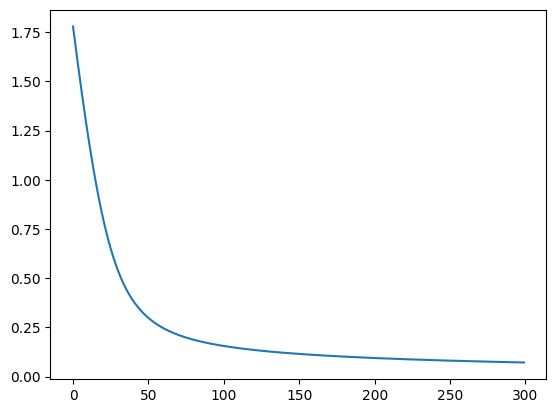

In [ ]:

lr = 0.01
epochs = 300
m, n = X.shape



# Reshaping y.
y = y.reshape(m,1)

# Normalizing the inputs.
x = ...

# Empty list to store losses.
losses = []

# Training loop.
for epoch in range(epochs):



    # prediction.
    y_hat = ...

    # Calculating loss and appending it in the list.
    l = ...
    losses.append(l)

    # Getting the gradients of loss w.r.t parameters.
    dw, db = ...

    # Updating the parameters.
    w = ...
    b = ...

    clear_output(wait = True)

    plt.plot(losses)
    plt.show()




Lets's check model's performance!  Use **coloring** function to vizualise it!


In [ ]:
def coloring(w, b, X):

  color_1 = 'rgb(150, 208, 252)'
  color_2 = 'rgb(160, 17, 53)'
  colors = []
  for i in range(X.shape[0]):
    if (X[i, :] @ w + b) < 0.0:
      colors.append(color_1)
    if (X[i, :] @ w + b)  >= 0.0:
      colors.append(color_2)
  return colors

In [ ]:
w

array([[ 0.46466206],
       [-1.08959168],
       [ 0.39163609]])

In [ ]:
colors = coloring(w, b, X)
draw_3d (w, b, X, colors)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = ...
clf.score(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



1.0

In [ ]:
print(clf.coef_, clf.intercept_)

[[-0.31719287 -3.39867222  0.47942313]] [0.02223185]


In [ ]:
colors = coloring(clf.coef_.T, clf.intercept_, X)
draw_3d (clf.coef_.T, clf.intercept_, X, colors)

# CVXPY version

Давайте теперь попробуем воспользоваться готовым пакетом CVXPY, а именно https://www.cvxpy.org/examples/machine_learning/logistic_regression.html . Адаптируйте этот туториал.

In [ ]:
beta = cp.Variable(4)
lambd = cp.Parameter(nonneg=True)
X = normalize(X)
n = X.shape[0]
h = X @ beta[:3] + beta[3]

log_likelihood =  -cp.sum(cp.logistic( -X @ beta[:3] - beta[3])) -cp.sum(cp.multiply(y[:, 0], ( X @ beta[:3] + beta[3])))

lambd.value = 1e-2
problem = cp.Problem(cp.Maximize(log_likelihood/n))



In [ ]:
problem.solve()

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.



-1.670186065894086e-08

In [ ]:
beta.value

array([ 2.92303117, 38.05012929,  1.08581543, -3.14815833])

In [ ]:
w1 = beta.value[:3]
b1 = beta.value[3]


In [ ]:
colors = coloring(w1, b1, X)
draw_3d (w1, b1, X, colors)

# Let us talk about metrics which could be used in order to validate our model

$$
Accuracy = \frac{1}{n} \sum_{i}{y^t_i=y^p_i}
$$



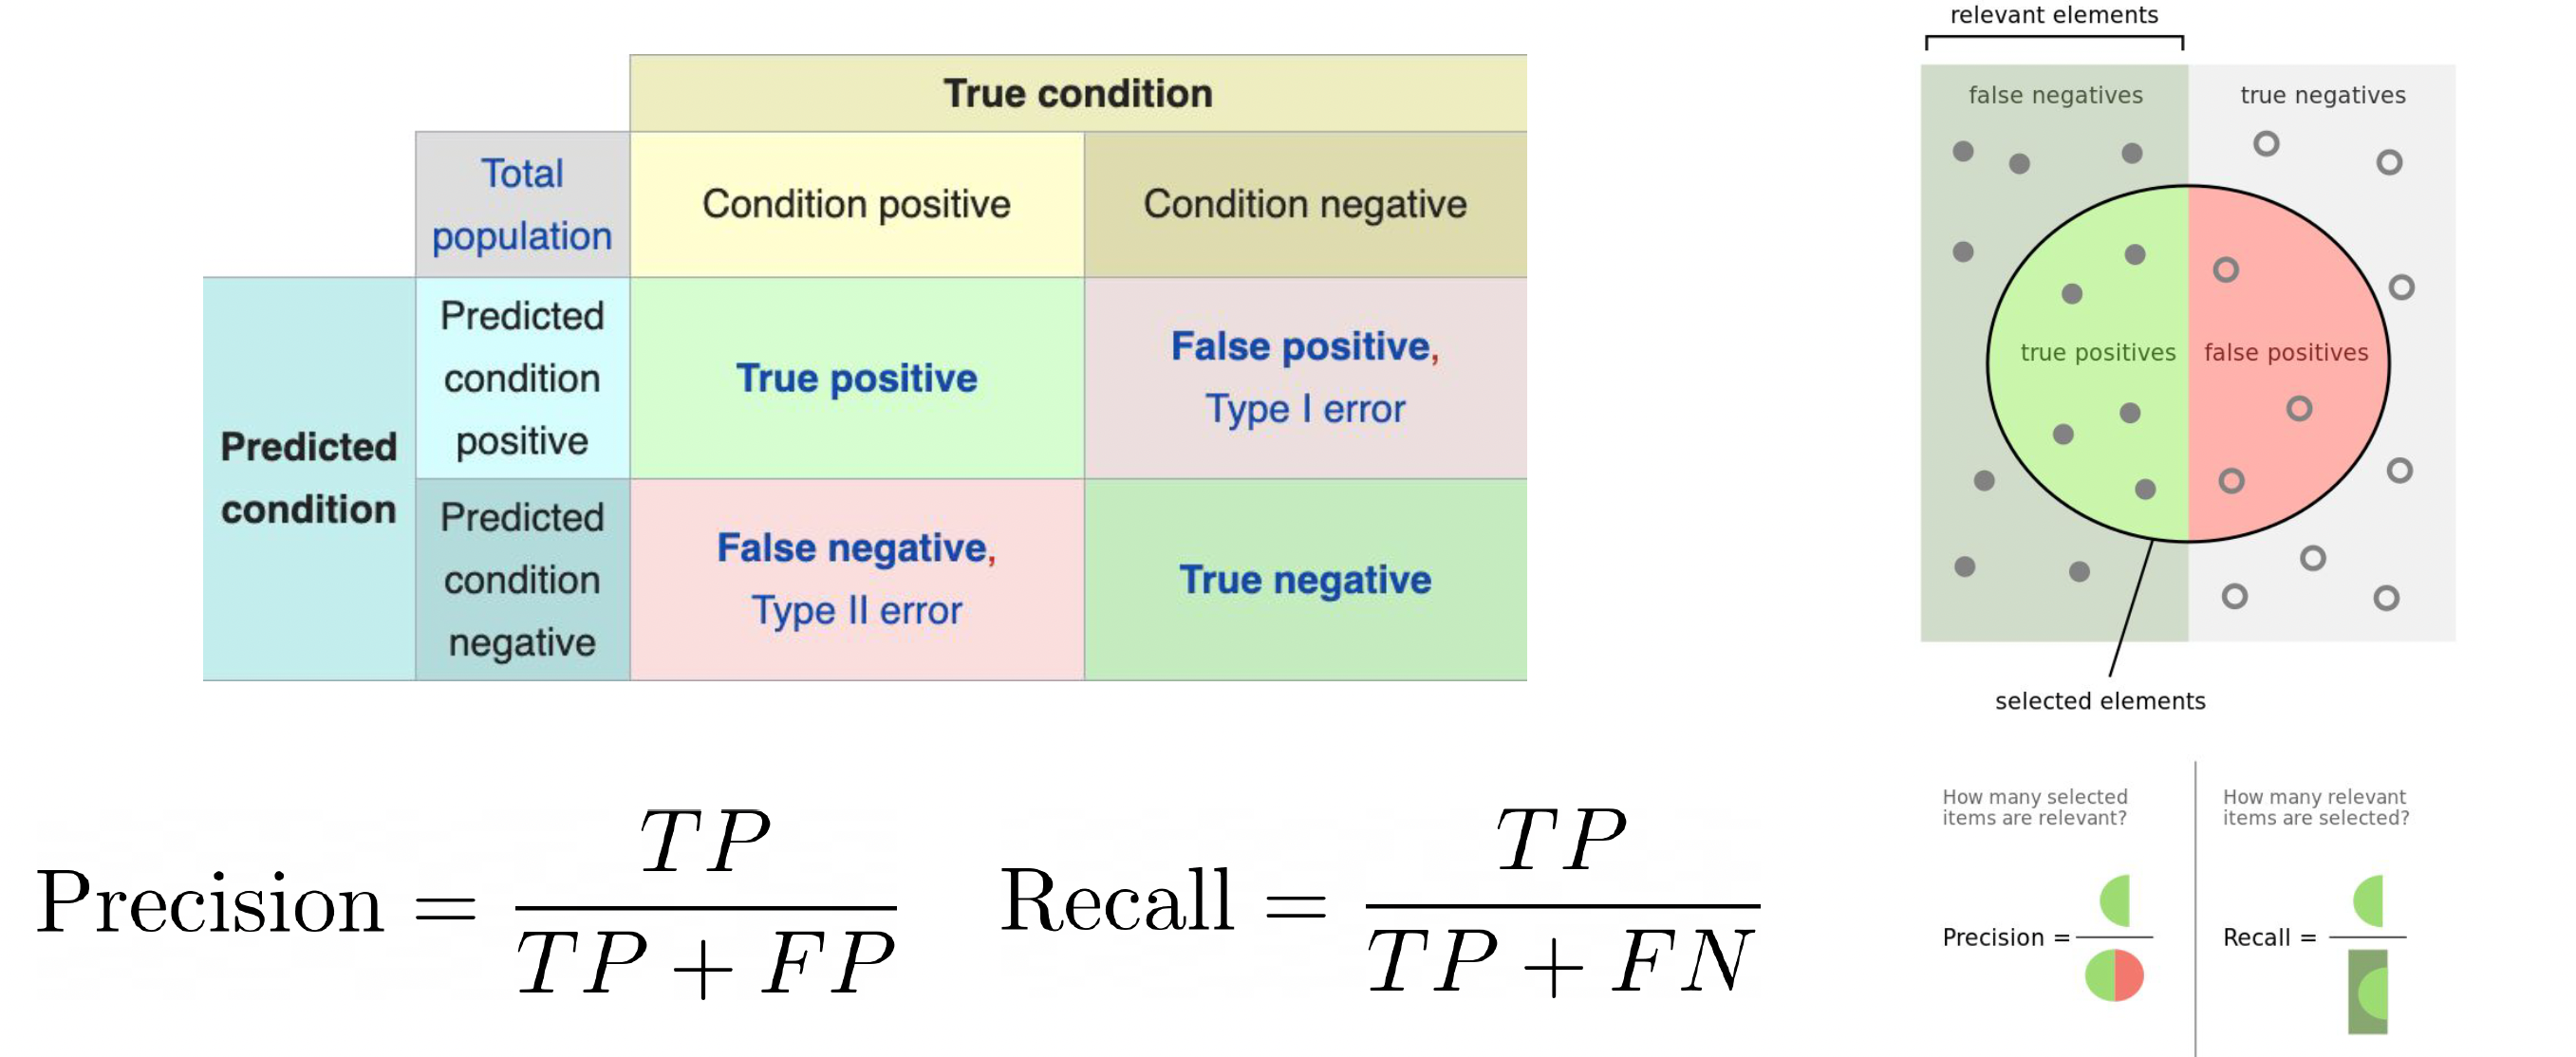

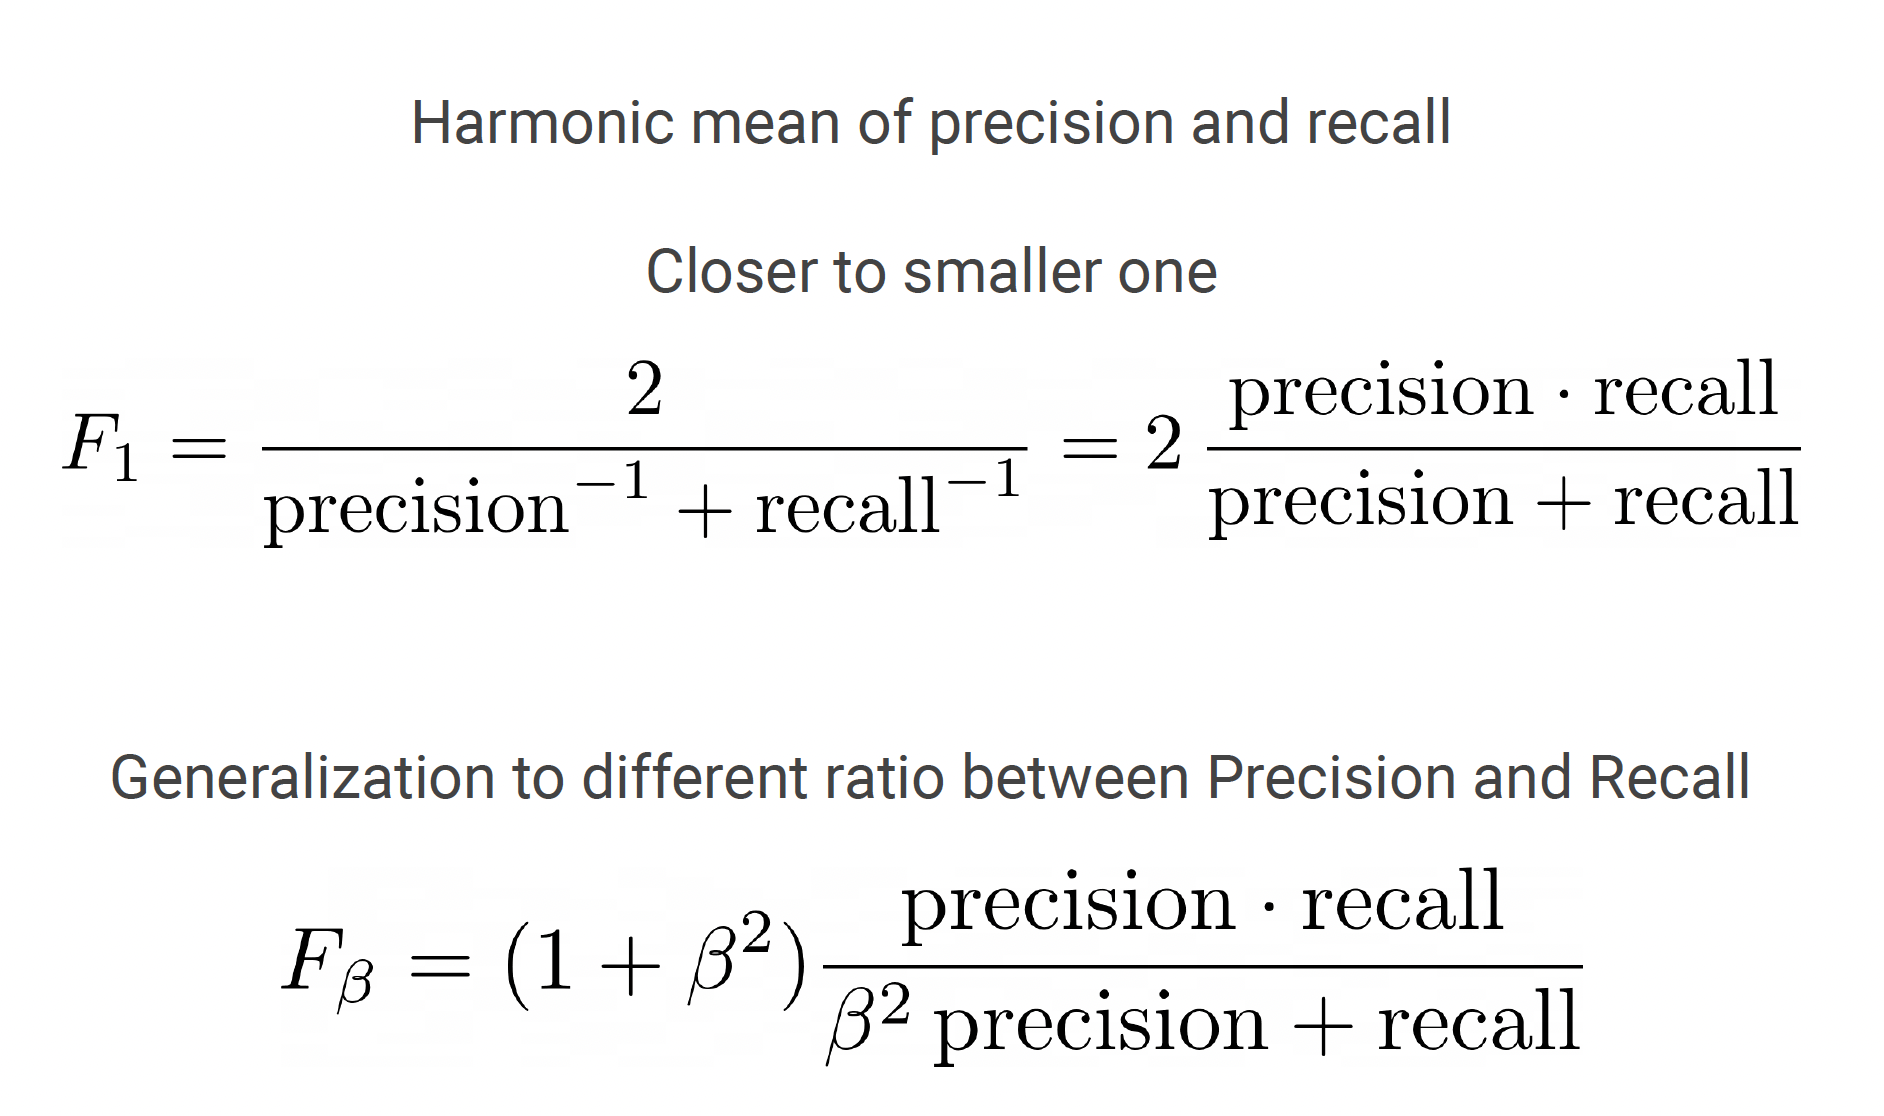

# ROC AUC

$$
FPR = \frac{FP}{FP+TN}
$$

$$
TPR = \frac{TP}{TP+FN}
$$

Than we vary the threshold in order to recompute false positive rate and true positive rate. The smallest threshold will provide $TPR=0$ and $FPR =0$, the biggest threshold will lead to $TPR=1$ and $FPR =1$.Varying threshold we'll obtain a curve. The area under this curve marks how good our classifier is.

What does it mean if AUC is equal to 1? to 0.5?
